<a href="https://colab.research.google.com/github/M-Jak/Finki/blob/main/Voved%20vo%20nauka%20na%20podatoci/Lab%201/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color = 'Orange'>Scraping page</font>
You need to scrape the phones with their price from: https://mobelix.com.mk/mk/mobilni-telefoni

The informations you need to extract are:


*   Phone brand: html tag (\<h5 class="mb-0">\)
*   Phone type: html tag (\<h3 class="h5 font-weight-normal">\)
*   Phone pruce: html tag (\<p class="h5 price">\)



# <font color='Orange'>Requirements specified for Web Scraping</font> (0.1 POINTS)


Import all libraries and modules that you are going to use.

In [139]:
#start here
#shift+enter in this box will run the code that's here and open a new code-box below
#import ....
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import requests

import warnings
requests.packages.urllib3.disable_warnings()
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

from bs4 import BeautifulSoup
from IPython.display import HTML

# <font color = 'Orange'> Start the scraping by sending HTTP request</font> (0.3 POINTS)


 **Fetch a website's content - send request**

In [140]:
url = 'https://mobelix.com.mk/mk/mobilni-telefoni'
response = requests.get(url)

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.



In [141]:
if str(response.status_code).startswith("2"):
  print("Status code is OK")

Status code is OK


# <font color = 'orange'>Parse the HTML with BeautifulSoup</font> (0.3 POINTS)

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.


**Parse using BeautifulSoap**




In [142]:
html = BeautifulSoup(response.text,"html.parser")

**Print the HTML code that you get**

In [143]:
#add your code
print(html)

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<title>Мобилни телефони | Mobelix Premium Mobilara</title>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" name="title"/>
<meta content="Mobile Store I Service | Mobelix Premium Mobilara Skopje нуди најголем избор на премиум додатоци за мобилни телефони: маски за мобилни телефони, диспеј, полначи, полначи за кола, бежични полначи, power bank, bluetooth слушалки, usb кабли, фолии и стакла за дисплеј и др." name="description"/>
<meta content="mobilara, mobilara skopje, mobilni dodatoci, мобилни додатоци, полначи, бежични полначи, power bank, Bluetooth slusalki, maski za telefoni" name="keywords"/>
<meta content="Mobelix Премиум Мобилара" property="og:site_name">
<meta content="http://mobelix.com.mk/mk/mobilni-telefoni" property="og:url">
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" p

# <font color='Orange'>Extracting data</font> (0.7 POINTS)

From the printed HTML code search for the data you need for building the dataset, by the classes that are given above in the html tags listed.



**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [144]:
html.select_one("h5.mb-0")

<h5 class="mb-0">Blackberry</h5>

**Add as many codeboxes as you need for selecting all the html elements**

In [145]:
#add your code
brands = html.find_all('h5',{'class':'mb-0'})

**Create lists with the extracted data from the html elements that you selected**

In [146]:
#add your code
types = html.find_all('h3',{'class':'h5 font-weight-normal'})

In [147]:
prices = html.find_all('p',{'class':'h5 price'})

**Print all lists that are containing the elements**

In [148]:
print(brands)
print()
print(types)
print()
print(prices)

[<h5 class="mb-0">Blackberry</h5>, <h5 class="mb-0">Samsung</h5>, <h5 class="mb-0">Samsung</h5>, <h5 class="mb-0">Apple</h5>, <h5 class="mb-0">Apple</h5>, <h5 class="mb-0">Apple</h5>, <h5 class="mb-0">Apple</h5>, <h5 class="mb-0">Apple</h5>, <h5 class="mb-0">Apple</h5>]

[<h3 class="h5 font-weight-normal">Porsche Design P9981</h3>, <h3 class="h5 font-weight-normal">Galaxy A03s 4/64GB</h3>, <h3 class="h5 font-weight-normal">Galaxy A04s 3/32GB</h3>, <h3 class="h5 font-weight-normal">iPhone 14 Pro Max 128GB E-SIM</h3>, <h3 class="h5 font-weight-normal">iPhone 14 Pro 512GB</h3>, <h3 class="h5 font-weight-normal">iPhone 14 Pro Max 512GB</h3>, <h3 class="h5 font-weight-normal">iPhone 14 Pro Max 1TB</h3>, <h3 class="h5 font-weight-normal">iPhone 14 Pro 128GB E-SIM</h3>, <h3 class="h5 font-weight-normal">iPhone 13 Mini 256GB</h3>]

[<p class="h5 price">19,000.00 ден</p>, <p class="h5 price"><del class="mr-2 small">9,200.00</del><br/>8,300.00 ден</p>, <p class="h5 price"><del class="mr-2 small"

**Check if all lists are the same size**

In [149]:
if len(brands) == len(types) == len(prices):
  print("All lists are the same size")
else:
  print("All lists are not the same size")

All lists are the same size


# <font color='Orange'>Create a Pandas DataFrame</font> (0.1 POINTS)


**Create the DataFrame from the lists you get and name your *Columns***

In [239]:
items = []
for i in range(len(brands)):
  item = {}
  item['Brand'] = brands[i].text
  item['Type'] = types[i].text
  if '<br/>' not in str(prices[i]):
   item['Price'] = float(prices[i].text.replace(' ден','').replace(',',''))
  else:
    item['Price'] = float(str(prices[i]).split('<br/>')[1].replace(' ден</p>','').replace(',','').strip())

  items.append(item)

df = pd.DataFrame(items)



In [151]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/VNP labs/Lab 1/results/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Print the dataset you obtain**

In [152]:
print(df)
filename = path + url.split('/')[2].split('.')[0] + "_" + url.split('/')[4] + '.csv'
df.to_csv(filename)

        Brand                           Type    Price
0  Blackberry           Porsche Design P9981  19000.0
1     Samsung             Galaxy A03s 4/64GB   8300.0
2     Samsung             Galaxy A04s 3/32GB   8300.0
3       Apple  iPhone 14 Pro Max 128GB E-SIM  61500.0
4       Apple            iPhone 14 Pro 512GB  89200.0
5       Apple        iPhone 14 Pro Max 512GB  78100.0
6       Apple          iPhone 14 Pro Max 1TB  98400.0
7       Apple      iPhone 14 Pro 128GB E-SIM  55300.0
8       Apple           iPhone 13 Mini 256GB  46800.0


#<font color='orange'>EDA</font> (0.2 POINTS)

## <font color='Orange'>Find statistic elements for the prices</font>
Like mean, median,  standard deviation, minimum, maximum

In [153]:
print(df.mean())
print()
print(df.median())
print()
print("Price minimum: " + str(df.Price.min()))
print("Price maximum: " + str(df.Price.max()))
print()
print(df.std())
print()
print(df.quantile([.1,.25,.5,.75,1],axis=0))
print()
print(stats.gmean(df.iloc[:,2],axis=0))
print()
print(df.Brand.value_counts())

Price    51655.555556
dtype: float64

Price    55300.0
dtype: float64

Price minimum: 8300.0
Price maximum: 98400.0

Price    34010.112875
dtype: float64

        Price
0.10   8300.0
0.25  19000.0
0.50  55300.0
0.75  78100.0
1.00  98400.0

37389.69088827894

Apple         6
Samsung       2
Blackberry    1
Name: Brand, dtype: int64


# <font color = 'Orange'>Data visualization </font> (0.3 POINTS)

Make a histogram & bar chart for the price values

Text(0, 0.5, 'Frequency')

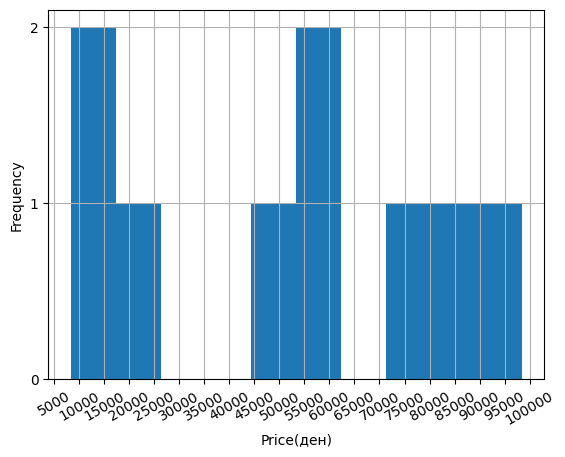

In [168]:
df['Price'].hist()
plt.xticks(rotation=30,ticks=[
    5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000
])
plt.yticks(ticks=[0,1,2])
plt.xlabel('Price(ден)')
plt.ylabel('Frequency')

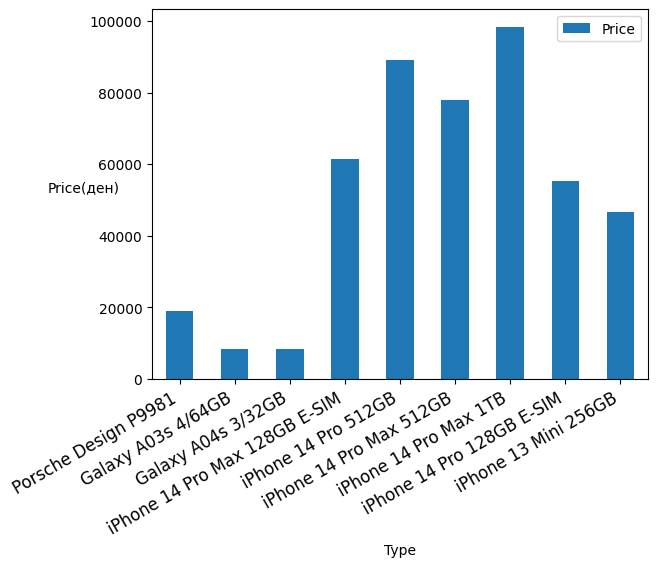

In [259]:
barchart = df.plot.bar(x=1,rot=30,xlabel="Type", ylabel="Price(ден)")
barchart.set_xticklabels(barchart.get_xticklabels(),fontsize=12,ha='right')
barchart.yaxis.get_label().set_rotation(0)
plt.show()